# Prediction of the survival of hospitalized alcoholic patients

## Introduction

In this project, the objective is to predict health outcomes of patients with Alcohol Use Disorder (AUD), who are admitted in Intensive Care Unit (ICU).

Alcohol is one of the most commonly abused addictive substances in the general population, that causes millions of deaths, and is legal to buy and consume in most of the countries. People with AUD can’t stop or control their alcohol consumption, and AUD is considered as a brain disorder. Patients with AUD have higher risks of comorbidities, serious illness and death, and this is why an early intervention and prognosis for severity of illness is highly important to improve treatment and survival rates of AUD patients. I want to focus on the prediction of people’s survival, when they are admitted to the Intensive Care Unit (ICU). The main idea is trying to strengthen medical care for those less likely to survive, and help them survive. But it can be used to increase doctor’s knowledge about the chances of survival of those patients, and so better inform and support families and relatives in this difficult process. 

First, I will explore the dataset in order to understand each feature by conducting feature engineering and exploratory data analysis (EDA). Then I will build and train various machine learning models and evaluate them in order to have the most accurate prediction.

## Data

The data used in our report is entirely extracted from the Medical Information Mart for Intensive Care (MIMIC-III), a freely-available database comprising deidentified healthrelated data from patients who were admitted to the critical care units of the Beth Israel Deaconess Medical Center. This database was co-developed by the Laboratory for Computing Physiology at MIT and Philips Healthcare, containing 26 tables storing data such as vital signs, demographics, and survival for more than 40,000 ICU patients from years ranging from 2001 to 2012. This database is widely used in academic discourse for training models to predict medical outcomes for patients.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
subject id | Unique identifier which specifies an individual patient - hadm id A single patient’s admission to the hospital
icustay id | ID which defines a single ICU stay - gender Patient's gender - age Patient's age - ethnicity Patient's ethnicity
los hospital | Length of stay at hospital Days (in Days)
los icu | Length of stay at ICU (in Days)
first icu stay | Flag (1) if it is the patient's first icu stay
sofa | Sequential Organ Failure Assessment (SOFA) - mortality prediction score
sapsii | Simplified Acute Physiology Score - severity of disease classification
congestive heart failure | Flag (1) if the patient has congestive heart failure
hypertension | Flag (1) if the patient has hypertension
liver disease | Flag (1) if the patient has liver disease
fluid electrolyte | Flag (1) if the patient has fluid electrolyte
coagulopathy | Flag (1) if the patient has coagulopathy
chronic pulmonary | Flag (1) if the patient has chronic pulmonary disease
admittime| Date and time the patient was admitted to the hospital
deathtime | Date and time of in-hospital death for the patient
glucose | Glucose level (mmol/L)
platelet | Platelet count ($10^3$/𝜇L)
ast | Aspartate aminotransferase measurement (U/L)
alt | Alanine aminotransferase measurement (U/L)
mcv | Mean corpuscular volume (𝜇m$^3$)
rdw | Red cell distribution width (%)
wbc |White blood cell count K/uL
hemoglobin | Hemoglobin measurement (g/dL) 

 

## Import the data

In [71]:
## Import the data and the package we need. 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the data
name = 'table.csv'
data = pd.read_csv(name)
data.head()

,Unnamed: 0,subject_id,hadm_id,icustay_id,gender,age,ethnicity,los_hospital,los_icu,first_icu_stay,...,glucose,rdw,hemoglobin,platelet,mcv,ast,alt,admittime,deathtime,ndays
0,0,52,190797,261857,M,38.1229,WHITE,9.5819,1.8504,True,...,78.0,13.7,7.5,26.0,97.0,42.0,22.0,2191-01-10 02:12:00,NaN,NaN
1,1,65,143430,244776,M,26.5640,WHITE,10.3569,3.3260,True,...,92.0,12.4,14.6,254.0,85.0,NaN,NaN,2132-08-10 07:13:00,NaN,NaN
2,2,117,164853,217966,F,49.8790,WHITE,17.8097,13.1976,True,...,73.0,14.5,7.3,24.0,87.0,83.0,46.0,2133-04-07 16:29:00,NaN,NaN
3,3,143,143808,293406,M,51.0645,WHITE,15.7222,2.7712,True,...,76.0,14.3,7.1,33.0,85.0,24.0,15.0,2155-01-17 21:40:00,NaN,NaN
4,4,172,148505,235343,M,46.4872,WHITE,3.4819,1.5581,True,...,80.0,12.1,13.5,162.0,90.0,NaN,NaN,2168-07-23 01:26:00,NaN,NaN


In [3]:
## Get the type, and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3186 non-null   int64  
 1   subject_id                3186 non-null   int64  
 2   hadm_id                   3186 non-null   int64  
 3   icustay_id                3186 non-null   int64  
 4   gender                    3186 non-null   object 
 5   age                       3186 non-null   float64
 6   ethnicity                 3186 non-null   object 
 7   los_hospital              3186 non-null   float64
 8   los_icu                   3186 non-null   float64
 9   first_icu_stay            3186 non-null   bool   
 10  sofa                      3186 non-null   int64  
 11  sapsii                    3186 non-null   int64  
 12  congestive_heart_failure  3186 non-null   int64  
 13  hypertension              3186 non-null   int64  
 14  liver_di

In [4]:
## Shape of the dataset
data.shape

(3186, 28)

In [5]:
## Missing values
data.isnull().sum()

Unnamed: 0                     0
subject_id                     0
hadm_id                        0
icustay_id                     0
gender                         0
age                            0
ethnicity                      0
los_hospital                   0
los_icu                        0
first_icu_stay                 0
sofa                           0
sapsii                         0
congestive_heart_failure       0
hypertension                   0
liver_disease                  0
fluid_electrolyte              0
coagulopathy                   0
chronic_pulmonary              0
glucose                        7
rdw                           10
hemoglobin                     8
platelet                       9
mcv                           10
ast                          500
alt                          496
admittime                      0
deathtime                   2813
ndays                       2813
dtype: int64

## Feature Engineering and EDA

### Dropping useless features

First, we want to drop the features that are not relevant for our prediction (ie the ones with id).

In [6]:
## Drop useless features
data = data.drop(columns=['Unnamed: 0','subject_id', 'hadm_id','icustay_id'])

### Dependant variable - survive

In [7]:
## Unique values of the feature
data['deathtime'].unique()

array([nan, '2147-06-26 17:56:00', '2124-11-15 18:29:00',
       '2135-10-23 17:30:00', '2158-10-28 19:21:00',
       '2111-12-29 21:00:00', '2126-06-08 11:07:00',
       '2114-10-30 12:00:00', '2164-05-12 15:25:00',
       '2114-03-29 20:15:00', '2158-01-15 08:00:00',
       '2135-12-04 12:00:00', '2128-04-14 18:24:00',
       '2176-07-14 20:05:00', '2118-03-08 23:30:00',
       '2122-12-10 20:58:00', '2167-02-26 13:35:00',
       '2143-01-19 20:43:00', '2190-07-07 05:47:00',
       '2118-12-16 10:26:00', '2123-10-06 17:17:00',
       '2160-09-28 12:00:00', '2193-04-26 22:33:00',
       '2168-12-11 05:40:00', '2178-11-14 12:00:00',
       '2174-03-28 21:35:00', '2145-11-19 04:15:00',
       '2171-05-21 12:00:00', '2179-01-30 21:20:00',
       '2197-04-24 09:10:00', '2153-04-04 12:32:00',
       '2129-02-16 01:20:00', '2139-12-06 01:30:00',
       '2170-10-31 16:07:00', '2163-11-08 16:45:00',
       '2182-04-20 14:10:00', '2142-05-10 02:00:00',
       '2104-02-16 12:00:00', '2170-04-28

To predict if a patient is going to died or survive, I add a column "survival". If the patient survives, the time f death is not provided and we fill the value of "death time" with "NaN"and the value of "survival" is 0. Otherwise, the patient dies, and we fill the value of "survival" with 1. 

In [8]:
death_time = data["deathtime"]
death_time=death_time.astype('str')
survive_or_not = pd.Series([0 if x == "nan" else 1 for x in death_time], index=death_time.index)
data['survive'] = survive_or_not

We can now drop the previous feature

In [9]:
data = data.drop(columns='deathtime', axis = 1)

### Dropping other features

In [10]:
## Data of non null values for ndays and survive features
data[~data['ndays'].isnull()][['ndays','survive']]

,ndays,survive
14,7 days 17:55:00,1
25,13 days 09:33:00,1
45,1 days 12:44:00,1
57,14 days 03:38:00,1
69,31 days 00:34:00,1
...,...,...
3085,4 days 15:35:00,1
3137,7 days 20:43:00,1
3140,4 days 16:31:00,1
3161,10 days 15:27:00,1


In [11]:
data[data['ndays'].isnull()][['ndays','survive']]

,ndays,survive
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
3181,NaN,0
3182,NaN,0
3183,NaN,0
3184,NaN,0


The feature 'nday' has a value only if the patient dies. Thus, it is not a relevant feature here because we can't have the information of the length of the stay in the hospital for every patient. Thus, I will drop it.

In [12]:
data = data.drop(columns='ndays' , axis = 1)

### Length of stay in hospital and ICU

Now, let's focus on the features 'los_hospital' and 'los_icu'. 

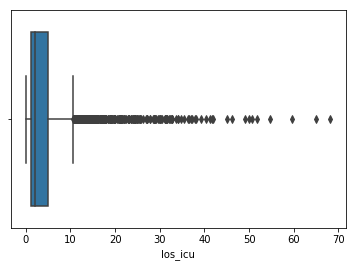

In [13]:
sns.boxplot(data['los_icu'])

In [14]:
data['los_icu'].describe()

count    3186.000000
mean        4.599455
std         6.354735
min         0.032100
25%         1.227875
50%         2.173250
75%         5.001075
max        68.205200
Name: los_icu, dtype: float64

Since the minimum is not equal to 0, it means that every partient has been in ICU for more or less days.

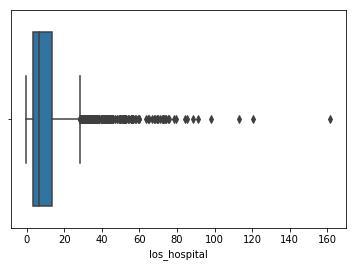

In [15]:
sns.boxplot(data['los_hospital'])

In [16]:
data['los_hospital'].describe()

count    3186.000000
mean       10.704456
std        12.076470
min        -0.387500
25%         3.412825
50%         6.779200
75%        13.384550
max       161.573600
Name: los_hospital, dtype: float64

It seems that they are a lot of outliers for both features. For the length of stay in the hospital, there are negative values that are not possible in real life. I will remove them.

In [17]:
data = data[data['los_hospital'] > 0]

The feature 'admittime' is no more relevant since we have the length of stay at hospital.

In [18]:
data = data.drop(columns='admittime' , axis = 1)

In [19]:
data.isnull().sum()

gender                        0
age                           0
ethnicity                     0
los_hospital                  0
los_icu                       0
first_icu_stay                0
sofa                          0
sapsii                        0
congestive_heart_failure      0
hypertension                  0
liver_disease                 0
fluid_electrolyte             0
coagulopathy                  0
chronic_pulmonary             0
glucose                       7
rdw                          10
hemoglobin                    8
platelet                      9
mcv                          10
ast                         497
alt                         493
survive                       0
dtype: int64

In [20]:
data['first_icu_stay'].astype(int).value_counts()

1    3180
Name: first_icu_stay, dtype: int64

Since every patient went to ICU, the feature is not relevant. I will drop it.

In [21]:
data.drop('first_icu_stay', axis = 1, inplace = True)

### Feature AST

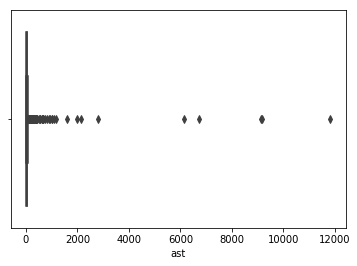

In [22]:
sns.boxplot(data['ast'])

In [23]:
data['ast'].describe()

count     2683.000000
mean        68.764816
std        394.990725
min          4.000000
25%         20.000000
50%         31.000000
75%         53.000000
max      11820.000000
Name: ast, dtype: float64

The normal range of ast is is 8 to 33 U/L. Here, we have a lot of outliers and thus I will remove them.

In [24]:
data = data[data['ast'] < 60]

### Feature ALT

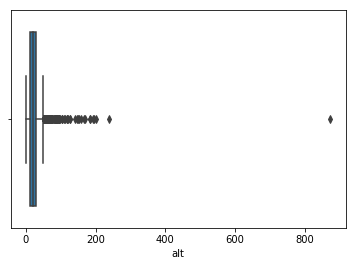

In [25]:
sns.boxplot(data['alt'])

In [26]:
data['alt'].describe()

count    2107.000000
mean       24.133412
std        27.124486
min         0.000000
25%        13.000000
50%        19.000000
75%        28.000000
max       874.000000
Name: alt, dtype: float64

For the alt feature, the normal range is 7 to 55 units per liter (U/L). Thus, I will drop outliers.

In [27]:
data = data[data['alt'] < 60]

### Feature Age

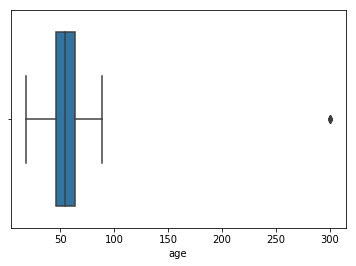

In [28]:
sns.boxplot(data['age'])

In [29]:
data['age'].describe()

count    2028.000000
mean       54.958561
std        18.516424
min        18.218400
25%        45.659075
50%        54.341750
75%        63.980600
max       300.352600
Name: age, dtype: float64

Since some values of age don't make sense (more than 90 years old), I will drop the ouliers.

In [30]:
data = data[data['age'] <= 90]

In [31]:
data.columns

Index(['gender', 'age', 'ethnicity', 'los_hospital', 'los_icu', 'sofa',
       'sapsii', 'congestive_heart_failure', 'hypertension', 'liver_disease',
       'fluid_electrolyte', 'coagulopathy', 'chronic_pulmonary', 'glucose',
       'rdw', 'hemoglobin', 'platelet', 'mcv', 'ast', 'alt', 'survive'],
      dtype='object')

### Missing values

The missing values can't be filled manually and thus I will drop them.

In [32]:
data.dropna(inplace=True)

In [33]:
data.shape

(2023, 21)

## Exploarory Data Analysis

Let's explore our data with some visualizations. For each feature, I would like to see how they affect the survival of the patients.

First, let's visualize the correlation between each feature

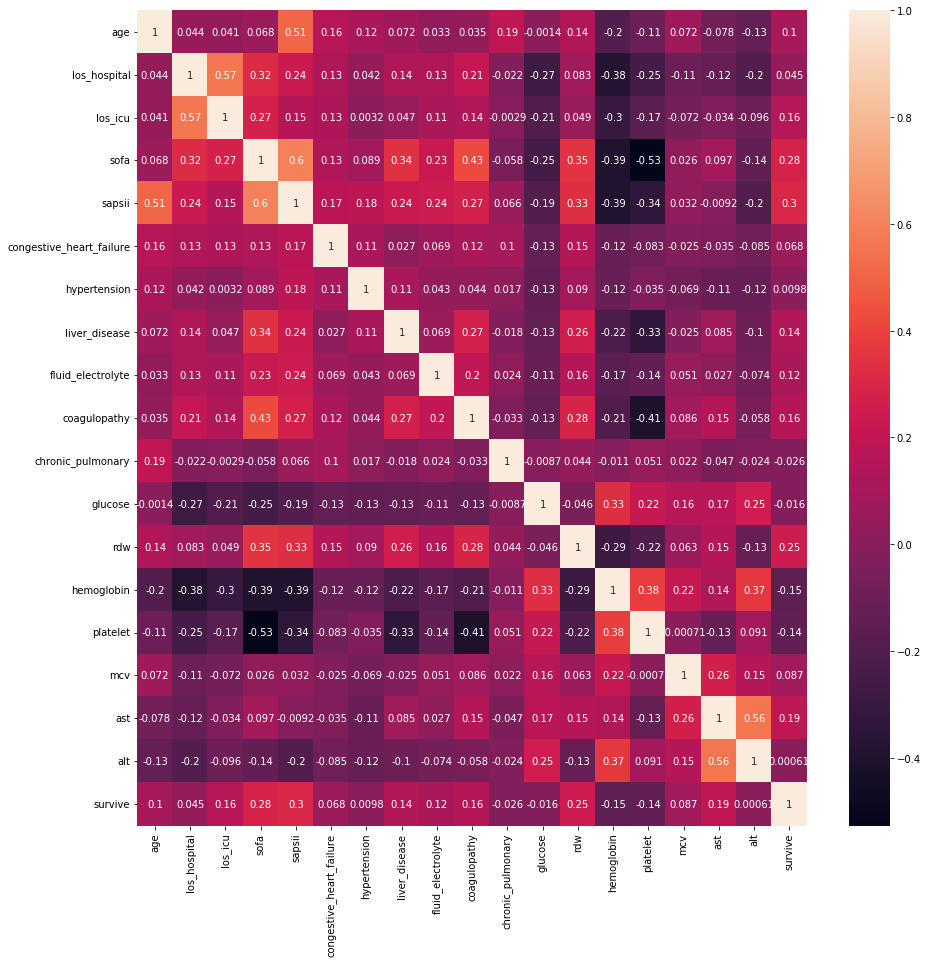

In [34]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)

'alt' and 'ast' seem very correlated. Thus, I will consider dropping one of them.  

In [35]:
data.drop('alt', axis = 1, inplace = True)

Then, I will plot each feature with a hue of the dependant variable.

### Survival

The plot above shows the number of patients who survived and not survived in our data.

Text(0.5, 1.0, 'Number of survival and dead')

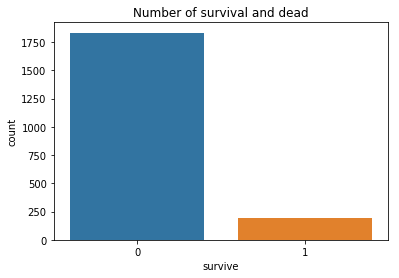

In [36]:
sns.countplot(data['survive'])
plt.title('Number of survival and dead')

The dataset is imbalanced and thus we will have to use an appropriate metric during the evaluation of the machine learning models.

### Age

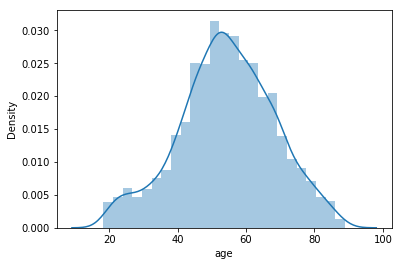

In [37]:
sns.distplot(data['age'])

Text(0.5, 1.0, 'Kde plots of the age of patients')

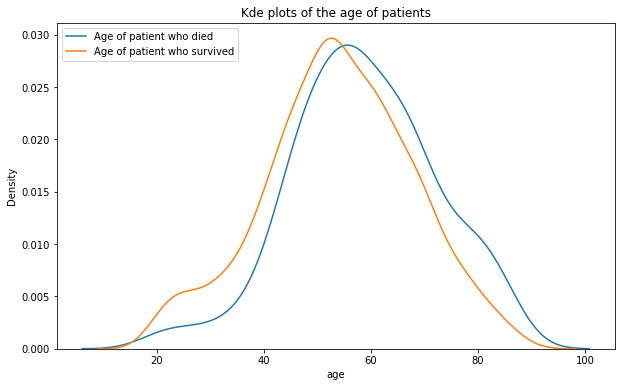

In [38]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['age'], hist = False, label = 'Age of patient who died')
sns.distplot(data[data['survive']==0]['age'], hist = False, label = 'Age of patient who survived')
plt.legend(loc = 2)
plt.title('Kde plots of the age of patients')

It seems that people who died are slightly older than who survived.

### Gender

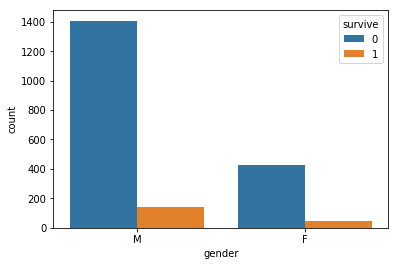

In [39]:
sns.countplot(data['gender'], hue = data['survive'])

In [40]:
# Proportion of men who died
print('Proportion of men who died: ' +
      str(100*len(data[(data['survive'] == 1) & (data['gender'] == 'M')])/len(data[data['gender'] == 'M']))
     + '%')

print('\n')

# Proportion of women who died
print('Proportion of women who died: ' +
      str(100*len(data[(data['survive'] == 1) & (data['gender'] == 'F')])/len(data[data['gender'] == 'F']))
     + '%')

Proportion of men who died: 9.167204648160103%


Proportion of women who died: 10.337552742616033%


We can see that in our dataset they are more men that women (24% of the data is women). However, there is a higher proportion of women that died among women than men.

### Ethnicity

In [41]:
data['ethnicity'].value_counts()

WHITE                                                       1441
UNKNOWN/NOT SPECIFIED                                        173
BLACK/AFRICAN AMERICAN                                       163
HISPANIC OR LATINO                                            69
UNABLE TO OBTAIN                                              52
OTHER                                                         50
HISPANIC/LATINO - PUERTO RICAN                                17
PATIENT DECLINED TO ANSWER                                    16
ASIAN                                                          9
BLACK/CAPE VERDEAN                                             4
PORTUGUESE                                                     3
ASIAN - CHINESE                                                3
BLACK/HAITIAN                                                  2
ASIAN - OTHER                                                  2
ASIAN - ASIAN INDIAN                                           2
WHITE - RUSSIAN          

In order to reduce the number of dummy variables that we will have, we will group together some ethnicity that are close: I will create 7 groups: WHITE, UNKNOWN/NOT SPECIFIED, BLACK/AFRICAN AMERICAN, HISPANIC OR LATINO, OTHER, PATIENT DECLINED TO ANSWER, ASIAN 

In [42]:
data['ethnicity'] = data['ethnicity'].replace(['HISPANIC/LATINO - PUERTO RICAN',
                          'HISPANIC/LATINO - DOMINICAN',
                          'HISPANIC/LATINO - GUATEMALAN',
                          'HISPANIC/LATINO - MEXICAN',
                          'HISPANIC/LATINO - SALVADORAN',
                          ], 'HISPANIC OR LATINO')


In [43]:
data['ethnicity'] = data['ethnicity'].replace(['ASIAN - CHINESE',
                                              'ASIAN - OTHER',
                                              'ASIAN - ASIAN INDIAN',
                                              'ASIAN - KOREAN',
                                              'ASIAN - JAPANESE'], 'ASIAN')

data['ethnicity'] = data['ethnicity'].replace('UNABLE TO OBTAIN',
                                              'UNKNOWN/NOT SPECIFIED')

data['ethnicity'] = data['ethnicity'].replace(['WHITE - RUSSIAN',
                                              'PORTUGUESE',
                                              'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
                                              'WHITE - OTHER EUROPEAN',
                                              'SOUTH AMERICAN',
                                              'AMERICAN INDIAN/ALASKA NATIVE',
                                              'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE'], 'WHITE')

data['ethnicity'] = data['ethnicity'].replace(['BLACK/CAPE VERDEAN',
                                              'BLACK/HAITIAN',
                                              'BLACK/AFRICAN'],'BLACK/AFRICAN AMERICAN')

data['ethnicity'] = data['ethnicity'].replace('MULTI RACE ETHNICITY','OTHER')


In [44]:
data['ethnicity'].value_counts()

WHITE                         1451
UNKNOWN/NOT SPECIFIED          225
BLACK/AFRICAN AMERICAN         171
HISPANIC OR LATINO              91
OTHER                           51
ASIAN                           18
PATIENT DECLINED TO ANSWER      16
Name: ethnicity, dtype: int64

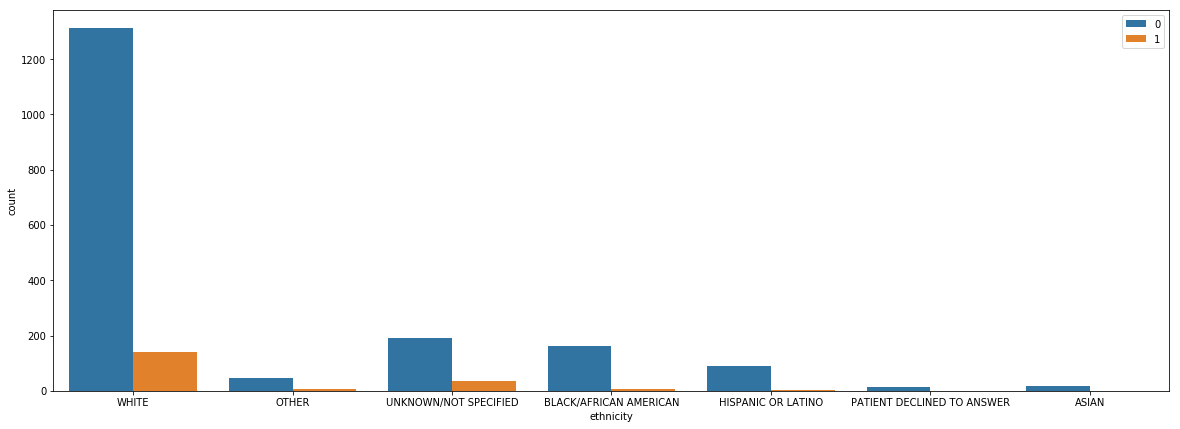

In [45]:
plt.figure(figsize = (20,7))
sns.countplot(data['ethnicity'], hue = data['survive'])
plt.legend(loc=1)

In [46]:
for eth in data['ethnicity'].unique():
    print(eth + ': '+ str(100*len(data[(data['survive'] == 1) & (data['ethnicity']==eth)])
                    /len(data[data['ethnicity'] == eth])) + '%')

WHITE: 9.648518263266713%
OTHER: 9.803921568627452%
UNKNOWN/NOT SPECIFIED: 15.555555555555555%
BLACK/AFRICAN AMERICAN: 4.678362573099415%
HISPANIC OR LATINO: 2.197802197802198%
PATIENT DECLINED TO ANSWER: 6.25%
ASIAN: 0.0%


We have the proportion of different not survival of various ethnicity.

### Length of stay in hospital and ICU

Text(0.5, 0, 'Days')

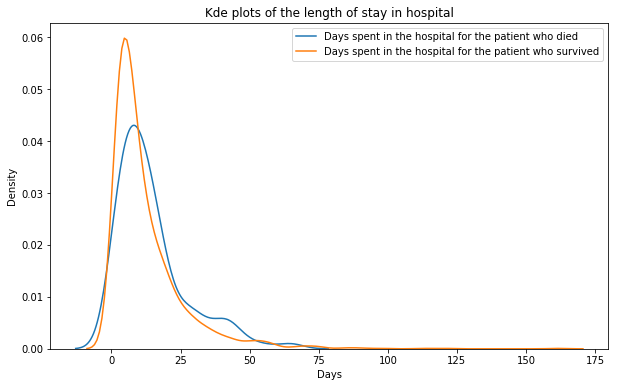

In [47]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['los_hospital'], hist = False, label = 'Days spent in the hospital for the patient who died')
sns.distplot(data[data['survive']==0]['los_hospital'], hist = False, label = 'Days spent in the hospital for the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the length of stay in hospital')
plt.xlabel('Days')

Text(0.5, 0, 'Days')

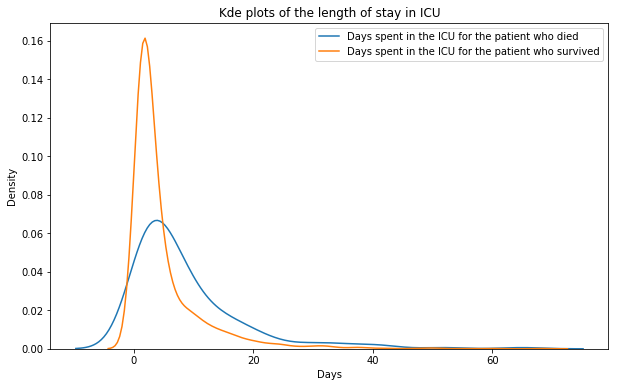

In [48]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['los_icu'], hist = False, label = 'Days spent in the ICU for the patient who died')
sns.distplot(data[data['survive']==0]['los_icu'], hist = False, label = 'Days spent in the ICU for the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the length of stay in ICU')
plt.xlabel('Days')

It seems that people who died have not been more longer in hospital of ICU than people who survived.

### Sofa

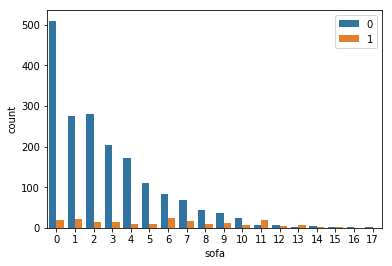

In [49]:
sns.countplot(data = data, x = 'sofa', hue = 'survive')
plt.legend(loc = 1)

### Sapsii score

Text(0.5, 0, 'Sapsii score')

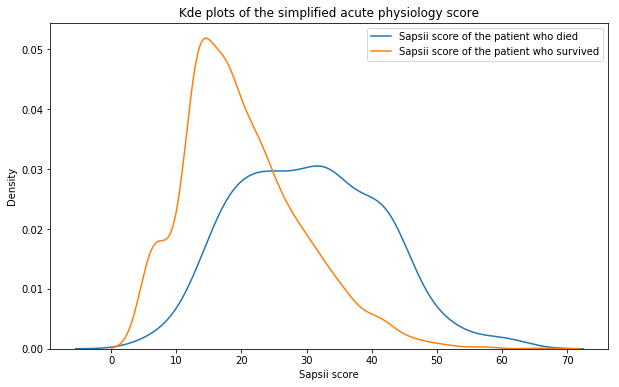

In [50]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['sapsii'], hist = False, label = 'Sapsii score of the patient who died')
sns.distplot(data[data['survive']==0]['sapsii'], hist = False, label = 'Sapsii score of the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the simplified acute physiology score')
plt.xlabel('Sapsii score')

As epected, the score is higher for patients who died.

### Congestive heart failure

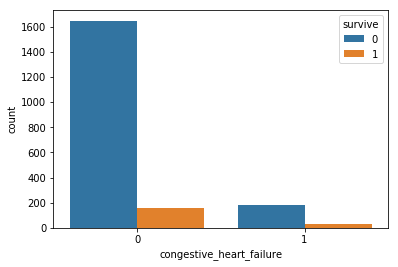

In [51]:
sns.countplot(data['congestive_heart_failure'], hue = data['survive'])

### Hypertension

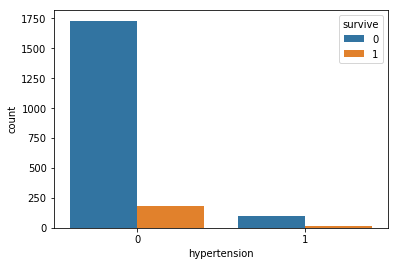

In [52]:
sns.countplot(data['hypertension'], hue = data['survive'])

### Liver disease

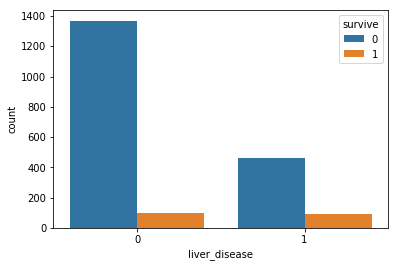

In [53]:
sns.countplot(data['liver_disease'], hue = data['survive'])

### Fluid electrolyte

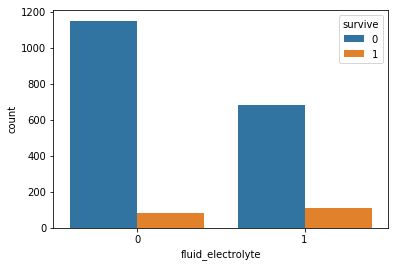

In [54]:
sns.countplot(data['fluid_electrolyte'], hue = data['survive'])

### Coagulopathy

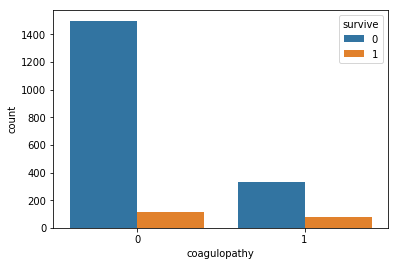

In [55]:
sns.countplot(data['coagulopathy'], hue = data['survive'])

### Chronic pulmonary

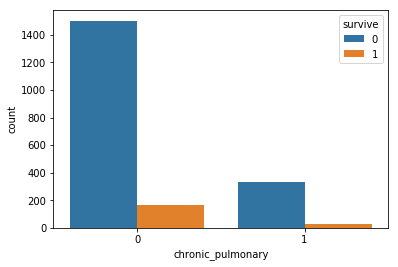

In [56]:
sns.countplot(data['chronic_pulmonary'], hue = data['survive'])

### Glucose

Text(0.5, 0, 'Glucose level (mmol/L)')

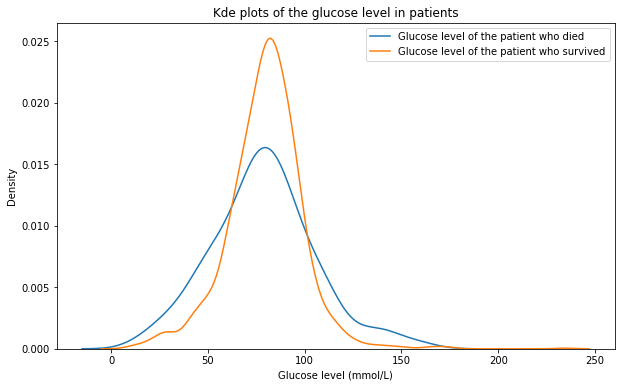

In [57]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['glucose'], hist = False, label = 'Glucose level of the patient who died')
sns.distplot(data[data['survive']==0]['glucose'], hist = False, label = 'Glucose level of the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the glucose level in patients')
plt.xlabel('Glucose level (mmol/L)')

The glucose level seems to not be very interesting feature for prediction.

### Red cell distribution width

Text(0.5, 0, 'Red cell distribution width (%)')

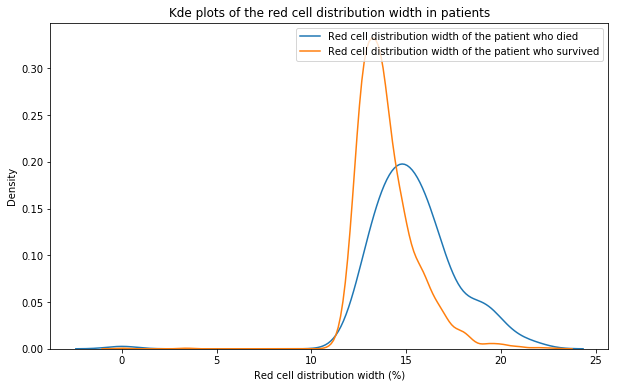

In [58]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['rdw'], hist = False, label = 'Red cell distribution width of the patient who died')
sns.distplot(data[data['survive']==0]['rdw'], hist = False, label = 'Red cell distribution width of the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the red cell distribution width in patients')
plt.xlabel('Red cell distribution width (%)')

From the plot, patients with higher red cell distribution width are more likely to die. 

### Hemoglobin

Text(0.5, 0, 'Hemoglobin level (g/dL)')

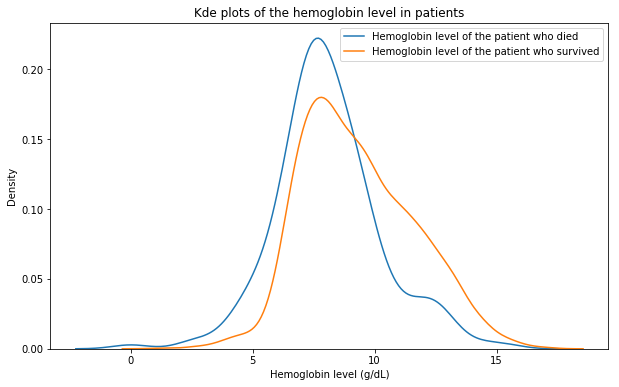

In [59]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['hemoglobin'], hist = False, label = 'Hemoglobin level of the patient who died')
sns.distplot(data[data['survive']==0]['hemoglobin'], hist = False, label = 'Hemoglobin level of the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the hemoglobin level in patients')
plt.xlabel('Hemoglobin level (g/dL)')

Patients who survived had a slighty higher hemoglobin level. 

### Platelet count

Text(0.5, 0, 'Platelet count ($10^3/μL$)')

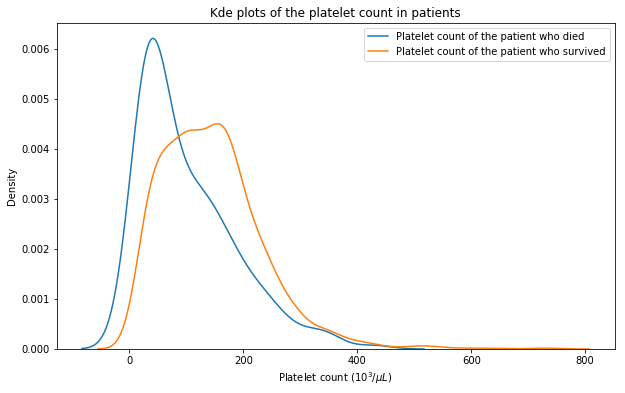

In [60]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['platelet'], hist = False, label = 'Platelet count of the patient who died')
sns.distplot(data[data['survive']==0]['platelet'], hist = False, label = 'Platelet count of the patient who survived')
plt.legend(loc = 1)
plt.title('Kde plots of the platelet count in patients')
plt.xlabel('Platelet count ($10^3/μL$)')

Once again, we can observe that patient with higher platelet count are more likely to survive.

### Mean corpuscular volume

Text(0.5, 0, 'Mean corpuscular volume ($μm^3$)')

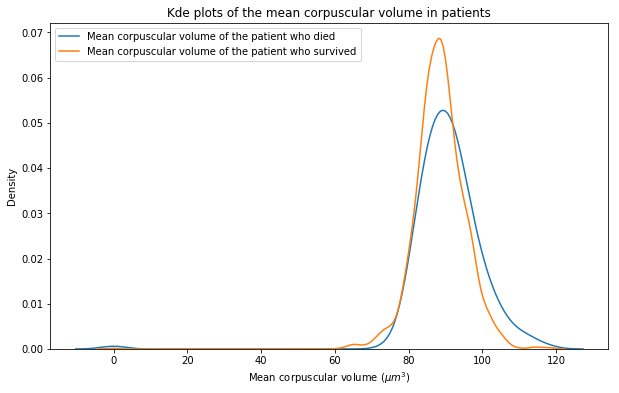

In [61]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['mcv'], hist = False, label = 'Mean corpuscular volume of the patient who died')
sns.distplot(data[data['survive']==0]['mcv'], hist = False, label = 'Mean corpuscular volume of the patient who survived')
plt.legend(loc = 0)
plt.title('Kde plots of the mean corpuscular volume in patients')
plt.xlabel('Mean corpuscular volume ($μm^3$)')

The mean corpuscular volume doesn't really give information on the survival of the patient.

### Aspartate aminotransferase

Text(0.5, 0, 'Aspartate aminotransferase (U/L)')

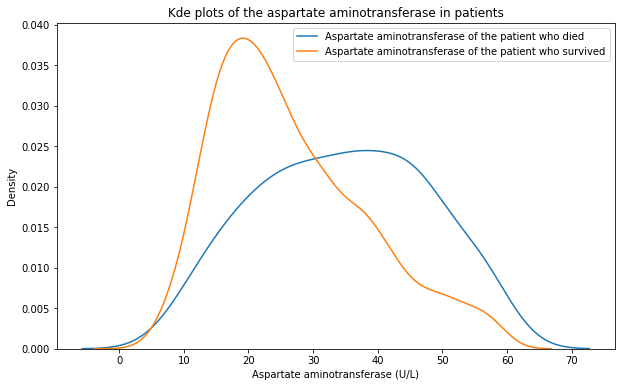

In [62]:
plt.figure(figsize = (10,6))
sns.distplot(data[data['survive']==1]['ast'], hist = False, label = 'Aspartate aminotransferase of the patient who died')
sns.distplot(data[data['survive']==0]['ast'], hist = False, label = 'Aspartate aminotransferase of the patient who survived')
plt.legend(loc = 0)
plt.title('Kde plots of the aspartate aminotransferase in patients')
plt.xlabel('Aspartate aminotransferase (U/L)')

This feature is relevant since the more the ast is high, the more the patient is likely to not survive.

## Machine Learning Models

### Oversampling

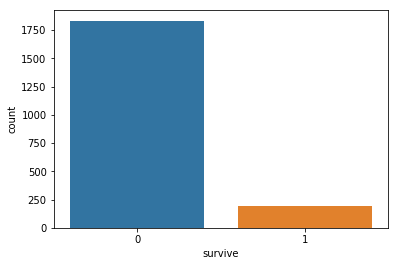

In [63]:
sns.countplot(data['survive'])

In [83]:
print(str(round(100*len(data[data['survive']==1])/len(data),2))+'% of the data are patients who did not survive.')

9.44% of the data are patients who did not survive.


Thus we have a imbalance dataset. In order to predict correctly, we need to balance a little bit the data. Since we don't have a lot of data (2023 observations), it is not a good strategy to undersample. Thus, I will oversample the patient who did not survive. In order to not increase the biais related to these patients, I will oversample in order to have approximately 30% of the data as patient who survived.

In [65]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['survive']==0)] 
df_minority = data[(data['survive']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 800, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [84]:
print(str(round(100*len(df_upsampled[df_upsampled['survive']==1])/len(df_upsampled),2))+'% of the data are patients who did not survive.')

30.4% of the data are patients who did not survive.


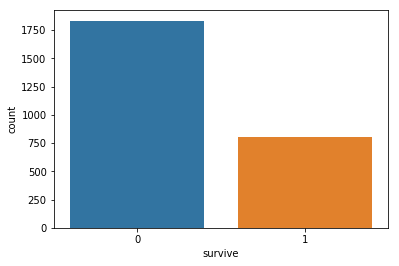

In [67]:
sns.countplot(df_upsampled['survive'])

### Dummy variables and split

Now, I need to create dummy variable for the categorical variables.

In [68]:
df_upsampled = pd.get_dummies(df_upsampled, columns = ['gender' , 'ethnicity'], drop_first = 'True')

Then, I will split the data in the training and testing set. 

In [69]:
## we split the data between training (70% of the data) and testing set (30% of the data)
## We also stratify the split since we have imbalanced data set

y = df_upsampled['survive'].astype('int32')
X = df_upsampled.drop(columns=['survive'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape
X_test.head()

,age,los_hospital,los_icu,sofa,sapsii,congestive_heart_failure,hypertension,liver_disease,fluid_electrolyte,coagulopathy,...,platelet,mcv,ast,gender_M,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_OTHER,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE
2713,54.0709,26.2701,19.7013,1,23,0,0,1,1,0,...,103.0,89.0,19.0,1,0,0,0,0,0,1
1939,57.5785,20.7486,3.8263,13,37,0,0,0,1,0,...,67.0,92.0,20.0,1,0,0,0,0,0,1
1515,21.8765,7.9743,10.2011,1,10,0,0,0,0,0,...,144.0,85.0,21.0,1,0,0,0,0,0,1
1043,80.6799,5.8979,1.7585,3,33,0,0,0,0,0,...,72.0,86.0,34.0,0,1,0,0,0,0,0
681,39.8507,57.4292,1.7480,1,7,0,0,0,0,0,...,149.0,85.0,27.0,1,0,0,0,0,0,1


### Logistic regression

The first model that I will build is a logistic regression. I will use the metrics precision, recall and f1-score to validate my models on the test set.

In [72]:
X_train_log = X_train.copy()
X_test_log = X_test.copy()

## fit the logistic model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_log, y_train)
LogisticRegression(max_iter=1000, random_state=42)

## Predict on the test set
y_prob = logreg.predict_proba(X_test_log)
y_pred_log = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

## Build confusion matrix and print the scores
cm = confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix: \n", cm)
print("\nF1 score:", f1_score(y_test, y_pred_log))
print("\nPrecision:", precision_score(y_test, y_pred_log))
print("\nRecall:", recall_score(y_test, y_pred_log))

Confusion Matrix: 
 [[507  45]
 [110 128]]

F1 score: 0.6228710462287105

Precision: 0.7398843930635838

Recall: 0.5378151260504201


This first model has not a poor f1-score but it is not a really good score. We still have a lot of False negative and False positive predictions.

### Random forest with cross validation

In [73]:
## Set the paramaters that we want to tune
grid_values = {'max_features': np.linspace(2,12,5, dtype='int32'),
               'n_estimators': np.linspace(50,500,5,dtype='int32'),
               'random_state': [42]} 

## Get the time of running this model
tic = time.time()

## Build and fit the model
rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5, scoring = 'f1')
rf_cv.fit(X_train_log, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 122.83 s


In [74]:
print('Best parameters', rf_cv.best_params_)

Best parameters {'max_features': 2, 'n_estimators': 50, 'random_state': 42}


In [75]:
## Predict
y_pred_rf_cv = rf_cv.predict(X_test)

## Print scores
cm = confusion_matrix(y_test, y_pred_rf_cv)
print ("Confusion Matrix: \n", cm)
print("\nF1 score:", f1_score(y_test, y_pred_rf_cv))
print("\nPrecision:", precision_score(y_test, y_pred_rf_cv))
print("\nRecall:", recall_score(y_test, y_pred_rf_cv))

Confusion Matrix: 
 [[543   9]
 [  8 230]]

F1 score: 0.9643605870020964

Precision: 0.9623430962343096

Recall: 0.9663865546218487


The random forest with the 5 folds cross validation is performing much better than the logistic regression. Indeed, the F1-score, precision and recall are really high. 

#### Feature importance

Random forest has a great method: feature importance. We can quantify the features that are the most important in our model.

Text(0.5, 0, 'Permutation Importance')

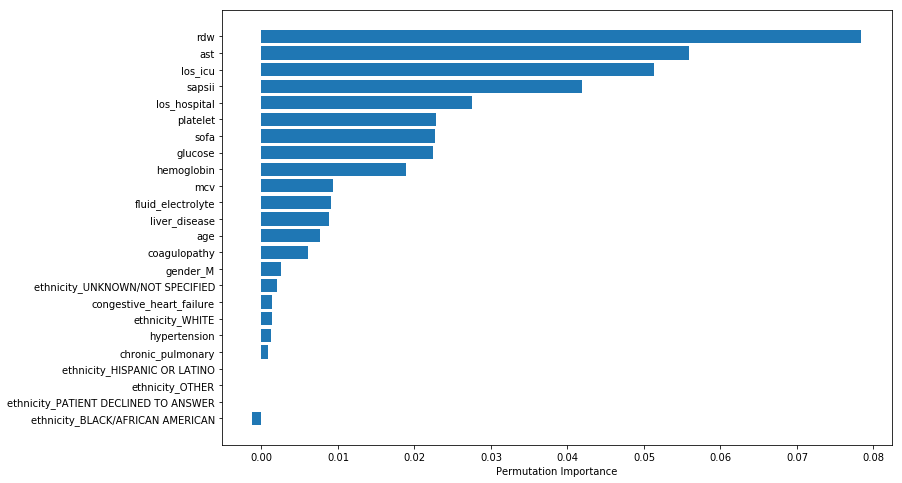

In [76]:
from sklearn.inspection import permutation_importance
plt.figure(figsize = (12,8))
perm_importance = permutation_importance(rf_cv, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

It seems that 'rdw', 'ast', 'los_icu' and 'sapsii' are the most important features. However, some ethnicities and hypertension level are the least important features.

### Gradient Boosting model with cross validation

In [77]:
## Set the paramaters that we want to tune
grid_values = {'n_estimators': np.linspace(1000, 5000, 3, dtype='int32'),  
               'learning_rate': [0.01,0.02,0.03],
               'random_state': [42]} 

tic = time.time()

## Build and train the Gradient boosting model
gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, cv=5, scoring = 'f1')
gbc_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 538.19 s


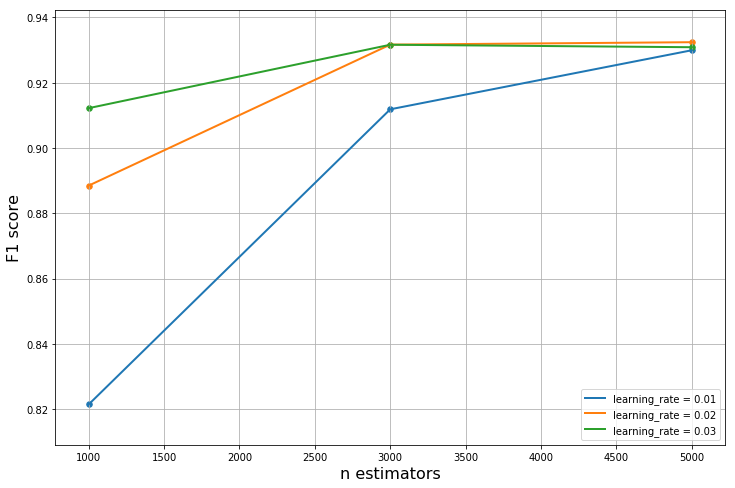

In [78]:
## Get the best parameter
n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
cv_f1_scores = gbc_cv.cv_results_['mean_test_score']

## Plot the F1-score given the learning rate and the number of estimators
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('F1 score', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['learning_rate'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], cv_f1_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], cv_f1_scores[(M*i):(M*i)+M], linewidth=2,
             label='learning_rate = '+str(grid_values['learning_rate'][i]))
plt.legend(loc='lower right')
plt.show()

In [79]:
## Best paramters
print('Best parameters', gbc_cv.best_params_)

Best parameters {'learning_rate': 0.02, 'n_estimators': 5000, 'random_state': 42}


In [80]:
## Predict using the tuned parameters
y_pred_boost = gbc_cv.predict(X_test)

## Print scores
cm = confusion_matrix(y_test, y_pred_boost)
print ("Confusion Matrix: \n", cm)
print("\nF1 score:", f1_score(y_test, y_pred_boost))
print("\nPrecision:", precision_score(y_test, y_pred_boost))
print("\nRecall:", recall_score(y_test, y_pred_boost))

Confusion Matrix: 
 [[530  22]
 [  8 230]]

F1 score: 0.9387755102040817

Precision: 0.9126984126984127

Recall: 0.9663865546218487


The Gradient boosting model has also a really good F1-score on the test set.

#### Feature importance

Text(0.5, 0, 'Permutation Importance')

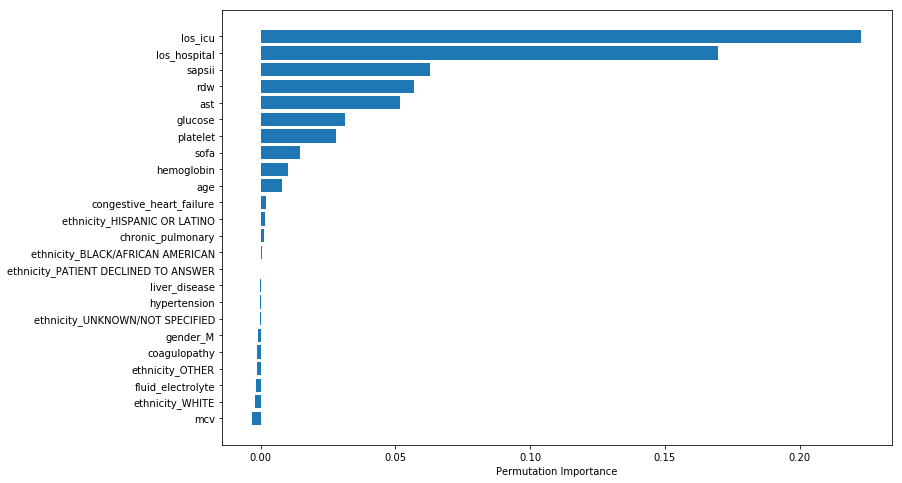

In [81]:
from sklearn.inspection import permutation_importance
plt.figure(figsize = (12,8))
perm_importance = permutation_importance(gbc_cv, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The gradient boosting model states that 'los_icu' is the most important feature. Then features 'los_hospital', 'sapsii' and 'rdw' play also a significant role in predicting the outcome. On the other hand, some features are really not important (some ethnicities, gender etc...)

## Comparison F1-score

In [82]:
## Below is the code to compare the F1 score of the logistic regression,
## Random Forest, and boosting models

comparison_data = {'Logistic Regression': ['{:.3f}'.format(f1_score(y_test, y_pred_log))],
                   'Random Forest with CV': ['{:.3f}'.format(f1_score(y_test, y_pred_rf_cv))],
                   'Boosting model with CV':['{:.3f}'.format(f1_score(y_test, y_pred_boost))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['F1 score'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Logistic Regression,Random Forest with CV,Boosting model with CV
F1 score,0.623,0.964,0.939


As we can observe, the random forest with cross validation has the best F1-score. This is based on the only paramters I tuned. Unfortunately, tuning parameters is very computing and is a long process so I did not tuned all the parameters.

## Conclusion

In this project, I manipulated the data in order to better understand it. Then I implemented various machine learning models (more or less complex) and evaluate them. The random forest is the one with the highest F1-score on the test set and has a very good F1-score.

If I had more time, I would have selected more features from the initial tables in order to improve the performances of the models. Moreover, I would have tuned other parameters such as the max_depth, min_samples_split, min_samples_leaf etc... in the random forest and gradient boosting. Also, I would have implemented many models together in order to perform an ensemble method of various different models (eg: 3 random forest, 4 gradient boosting, 1 logistic regression).